## x_train (pure images from dataset)

20
20
(20, 512, 512, 3)
uint8


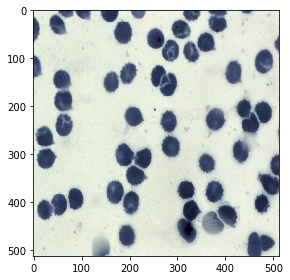

In [54]:

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from skimage.transform import resize
from skimage.io import imread, imshow
from tensorflow import keras
data_path = '../input/mydata6'

row = 512
columns = 512

train_data_path = os.path.join(data_path, 'train')
images = os.listdir(train_data_path)
images.sort()

training_images = images[1::2]
training_masks = images[::2] 
print(len(training_images)) #20
print(len(training_masks))
x_train = np.zeros((len(training_images), row, columns, 3), dtype=np.uint8)
index = 0
for x in training_images:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    x_train[index] = image
    index += 1
print(x_train.shape)
#x_train = x_train / 255
#x_train = x_train.astype('float32')
imshow(x_train[0])
print(x_train.dtype)

# # y_train (pure masks from dataset)

In [55]:

y_train = np.zeros((len(training_masks), row, columns, 3), dtype=np.uint8)
#p = os.path.join(train_data_path, training_masks[0])
#i = imread(p)
#k = resize(i, (128, 128))
#imshow(k)

index = 0
for x in training_masks:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
    #image.resize((128,128,1))
    y_train[index] = image
    index += 1
y_train.shape  
type(y_train)
#y_train = y_train / 255
#y_train = y_train.astype('float32')
print(y_train.dtype)
imshow(y_train[0])

bool


ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>

# Augmentation

In [56]:
import albumentations as A

transform = A.Compose([
    #A.RandomCrop(width=512, height=512),
    A.HorizontalFlip(p=0.5),
    #A.VerticalFlip(p=1),
    #A.RandomRotate90(p=1),
    A.RandomBrightnessContrast(p=0.5),
    A.Blur(blur_limit=7, always_apply=True, p=1.5),
    A.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5, always_apply=True, p=0.5),
    A.GaussNoise (var_limit=(10.0, 50.0), mean=0, always_apply=True, p=0.5)
])

# aug_x_train (Augmented images from dataset)
# aug_y_train (Augmented masks from dataset)

In [57]:
import os
import numpy as np
from skimage.io import imread, imshow
train_dir = '../input/mydata6/train'
new_images = os.listdir(train_dir)
new_images.sort()
new_training_image = new_images[1::2]
new_training_mask = new_images[::2]
aug_x_train = np.zeros((len(new_training_image), 1200, 1600, 3), dtype=np.uint8)
aug_y_train = np.zeros((len(new_training_mask), 1200, 1600, 3), dtype=np.uint8)
#print(aug_x_train.shape)
count = 0
for x in range(len(new_training_image)):
    image1 = imread(os.path.join(train_dir, new_training_image[x]))  
    mask1 = imread(os.path.join(train_dir, new_training_mask[x]))
    transformed = transform(image=image1, mask=mask1)
    #print(transformed['image'].shape)
    aug_x_train[count] = transformed['image']
    aug_y_train[count] = transformed['mask']
    count += 1
print(aug_x_train.shape)
print(aug_y_train.shape)


(20, 1200, 1600, 3)
(20, 1200, 1600, 3)


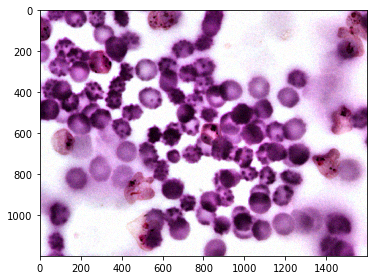

In [58]:
imshow(aug_x_train[19])

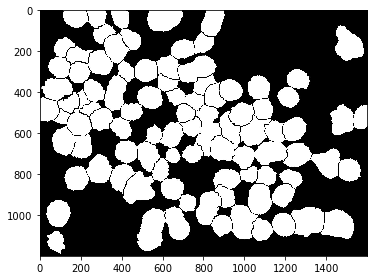

In [59]:
imshow(aug_y_train[19])

# Augmented images + masks saved on cwd for inspection

In [60]:
from skimage.io import imsave
pred_dir = './new_preds'
if not os.path.exists(pred_dir):
    os.mkdir(pred_dir)
for x in range(len(aug_x_train)):
    imsave(os.path.join(pred_dir, '0' + str(x) + '_image' + '.png'), aug_x_train[x])
    imsave(os.path.join(pred_dir, '0' + str(x) + '_mask'  + '.jpg'), aug_y_train[x])
    

In [61]:
meow = os.listdir('./new_preds')
meow.sort()
meow
aug_train_image = meow[::2] 
#new_train
aug_train_mask = meow[1::2]

total_train_images = training_images + aug_train_image
total_train_images

['00a02700-2ea2-4590-9e15-ffc9160fd3de.png',
 '00c8364b-8c85-4502-bcfe-64736fe76815.png',
 '00d04a90-80e5-4bce-9511-1b64eabb7a47.png',
 '0a3b53c7-e7ab-4135-80aa-fd2079d727d6.png',
 '0a747cb3-c720-4572-a661-ab5670a5c42e.png',
 '0a7bfa8a-ee52-4f7a-b9c5-2919ecfa93ef.png',
 '0ab56f9a-846d-49e2-a617-c6cc477fdfad.png',
 '0ac747cd-ff32-49bf-bc1a-3e9b7702ce9c.png',
 '0b04ec46-5119-4cda-8c35-c4e5b6f0eed0.png',
 '0b923ab7-ebff-4079-a4bb-af7da89f374e.png',
 '0ca25c88-457f-4f03-bbc1-98fb6663f1d1.png',
 '0ceb4539-5c4c-487d-9826-452a88b5d537.png',
 '0d095f3a-9243-472b-90b4-0ce8309e778c.png',
 '0d098413-6911-4535-b70a-3c3effd8cf49.png',
 '0d2aba33-6920-4001-bd54-59fe0bf9f50e.png',
 '0d3c2521-da55-4df5-bf06-56b3bd4fb2fc.png',
 '0d7bf56f-3b5a-40bd-971c-2ca33dd89b2c.png',
 '0da07970-3146-479c-8a07-f61ed32814a9.png',
 '0dcbf2c9-f959-4703-a72b-f6a81e66c2ea.png',
 '0dcca702-a4ef-4fb3-a940-9c0c140b21c7.png',
 '00_image.png',
 '010_image.png',
 '011_image.png',
 '012_image.png',
 '013_image.png',
 '014_image

In [62]:
total_train_masks = training_masks + aug_train_mask
total_train_masks

['00a02700-2ea2-4590-9e15-ffc9160fd3de.jpg',
 '00c8364b-8c85-4502-bcfe-64736fe76815.jpg',
 '00d04a90-80e5-4bce-9511-1b64eabb7a47.jpg',
 '0a3b53c7-e7ab-4135-80aa-fd2079d727d6.jpg',
 '0a747cb3-c720-4572-a661-ab5670a5c42e.jpg',
 '0a7bfa8a-ee52-4f7a-b9c5-2919ecfa93ef.jpg',
 '0ab56f9a-846d-49e2-a617-c6cc477fdfad.jpg',
 '0ac747cd-ff32-49bf-bc1a-3e9b7702ce9c.jpg',
 '0b04ec46-5119-4cda-8c35-c4e5b6f0eed0.jpg',
 '0b923ab7-ebff-4079-a4bb-af7da89f374e.jpg',
 '0ca25c88-457f-4f03-bbc1-98fb6663f1d1.jpg',
 '0ceb4539-5c4c-487d-9826-452a88b5d537.jpg',
 '0d095f3a-9243-472b-90b4-0ce8309e778c.jpg',
 '0d098413-6911-4535-b70a-3c3effd8cf49.jpg',
 '0d2aba33-6920-4001-bd54-59fe0bf9f50e.jpg',
 '0d3c2521-da55-4df5-bf06-56b3bd4fb2fc.jpg',
 '0d7bf56f-3b5a-40bd-971c-2ca33dd89b2c.jpg',
 '0da07970-3146-479c-8a07-f61ed32814a9.jpg',
 '0dcbf2c9-f959-4703-a72b-f6a81e66c2ea.jpg',
 '0dcca702-a4ef-4fb3-a940-9c0c140b21c7.jpg',
 '00_mask.jpg',
 '010_mask.jpg',
 '011_mask.jpg',
 '012_mask.jpg',
 '013_mask.jpg',
 '014_mask.jpg',

# total_x_train (pure images + augmented images)

In [63]:
total_x_train = np.zeros((len(training_images) + len(new_training_image), row, columns, 3), dtype=np.uint8)
t_path = '../input/mydata6/train'
c = 0
d = 0 
for x in total_train_images:
    if c< len(training_images):
        img = imread(os.path.join(t_path, x))
        img = resize(img, (row, columns), mode='constant', preserve_range=True)
        total_x_train[c] = img
        c += 1
    else: 
        #img2 = imread(os.path.join('./new_preds', x))
        #img2 = resize(img2, (512, 512), mode='constant', preserve_range=True)
        #total_x_train[c] = img2
        #c += 1
        total_x_train[c] = resize(aug_x_train[d], (row, columns), mode='constant', preserve_range=True)
        c += 1
        d += 1

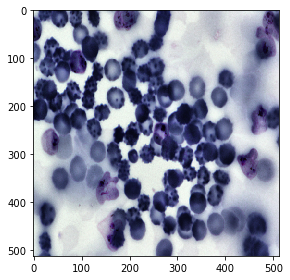

In [64]:
imshow(total_x_train[19])

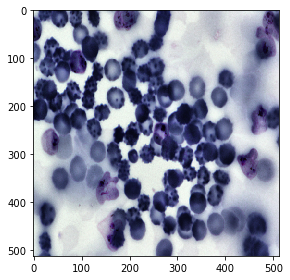

In [65]:
imshow(x_train[19])

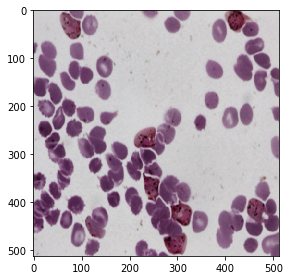

In [66]:
imshow(total_x_train[38])

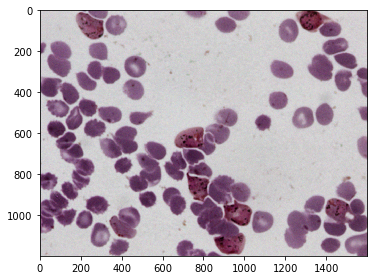

In [67]:
imshow(aug_x_train[18])

# total_y_train (pure masks + augmented masks)

In [68]:
total_y_train = np.zeros((len(training_masks)  + len(new_training_mask), row, columns, 3), dtype=np.uint8)
t_path = '../input/mydata6/train'
c = 0
d = 0 
for x in total_train_masks:
    if c< len(training_masks):
        img = imread(os.path.join(t_path, x))
        img = resize(img, (row, columns), mode='constant', preserve_range=True)
        total_y_train[c] = img
        c += 1
    else: 
        #img2 = imread(os.path.join('./new_preds', x))
        #img2 = resize(img2, (512, 512), mode='constant', preserve_range=True)
        #total_x_train[c] = img2
        #c += 1
        total_y_train[c] = resize(aug_y_train[d], (row, columns), mode='constant', preserve_range=True)
        c += 1
        d += 1

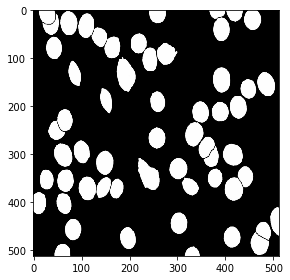

In [69]:
imshow(total_y_train[14])

In [70]:
imshow(y_train[14])

ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>

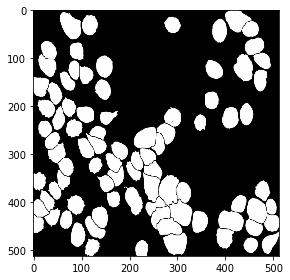

In [71]:
imshow(total_y_train[38])

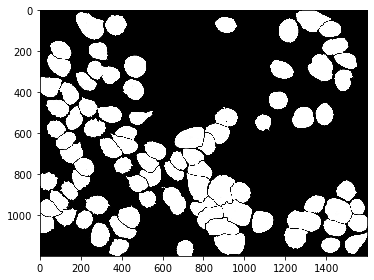

In [72]:
imshow(aug_y_train[18])

In [73]:
print(total_x_train.shape)
print(total_y_train.shape)
print(total_x_train.dtype)
print(total_y_train.dtype)

(40, 512, 512, 3)
(40, 512, 512, 3)
uint8
uint8


# Important

In [74]:
total_y_train = total_y_train.astype('bool')
print(total_y_train.dtype)

bool


In [75]:
''''
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from skimage.transform import resize
from skimage.io import imread, imshow
from tensorflow import keras
data_path = '../input/data12'

row = 512
columns = 512

train_data_path = os.path.join(data_path, 'train')
images = os.listdir(train_data_path)
images.sort()

training_images = images[1::2]
training_masks = images[::2] 
print(len(training_images))
print(len(training_masks))
x_train = np.zeros((20, row, columns, 3), dtype=np.uint8)
index = 0
for x in training_images:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    x_train[index] = image
    index += 1
print(x_train.shape)
#x_train = x_train / 255
#x_train = x_train.astype('float32')
imshow(x_train[0])
print(x_train.dtype)
'''

"'\nimport os\nimport numpy as np\nfrom PIL import Image\nimport matplotlib.pyplot as plt\nimport tensorflow as tf\n%matplotlib inline\nfrom skimage.transform import resize\nfrom skimage.io import imread, imshow\nfrom tensorflow import keras\ndata_path = '../input/data12'\n\nrow = 512\ncolumns = 512\n\ntrain_data_path = os.path.join(data_path, 'train')\nimages = os.listdir(train_data_path)\nimages.sort()\n\ntraining_images = images[1::2]\ntraining_masks = images[::2] \nprint(len(training_images))\nprint(len(training_masks))\nx_train = np.zeros((20, row, columns, 3), dtype=np.uint8)\nindex = 0\nfor x in training_images:\n    path = os.path.join(train_data_path, x)\n    image = imread(path)\n    image = resize(image, (row, columns), mode='constant', preserve_range=True)\n   # image.resize((128,128,1))\n    x_train[index] = image\n    index += 1\nprint(x_train.shape)\n#x_train = x_train / 255\n#x_train = x_train.astype('float32')\nimshow(x_train[0])\nprint(x_train.dtype)\n"

In [76]:
'''
y_train = np.zeros((20, row, columns, 3), dtype=np.uint8)
#p = os.path.join(train_data_path, training_masks[0])
#i = imread(p)
#k = resize(i, (128, 128))
#imshow(k)

index = 0
for x in training_masks:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
    #image.resize((128,128,1))
    y_train[index] = image
    index += 1
y_train.shape  
type(y_train)
#y_train = y_train / 255
#y_train = y_train.astype('float32')
print(y_train.dtype)
imshow(y_train[0])
'''

"\ny_train = np.zeros((20, row, columns, 3), dtype=np.uint8)\n#p = os.path.join(train_data_path, training_masks[0])\n#i = imread(p)\n#k = resize(i, (128, 128))\n#imshow(k)\n\nindex = 0\nfor x in training_masks:\n    path = os.path.join(train_data_path, x)\n    image = imread(path)\n    image = resize(image, (row, columns), mode='constant', preserve_range=True)\n    #image.resize((128,128,1))\n    y_train[index] = image\n    index += 1\ny_train.shape  \ntype(y_train)\n#y_train = y_train / 255\n#y_train = y_train.astype('float32')\nprint(y_train.dtype)\nimshow(y_train[0])\n"

# x_test (Images for prediction)

(5, 512, 512, 3)
uint8


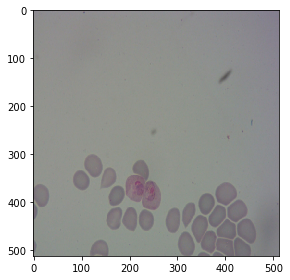

In [77]:
test_data_path = os.path.join(data_path, 'test')
images = os.listdir(test_data_path)
images.sort()
images

testing_images = images[1::2]
testing_masks = images[::2] 

x_test = np.zeros((5, row, columns, 3), dtype=np.uint8)

index = 0
for x in testing_images:
    path = os.path.join(test_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    x_test[index] = image
    index += 1
print(x_test.shape)  
type(x_test)
#x_test = x_test / 255
#x_test = x_test.astype('float32')
print(x_test.dtype)
imshow(x_test[0])

# y_test (Ground truth for prediction)

(5, 512, 512, 3)
float32


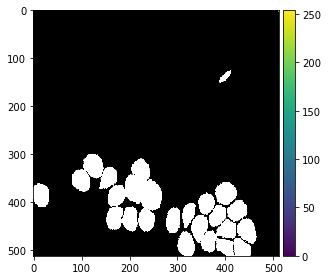

In [78]:
y_test = np.zeros((5, row, columns, 3), dtype=np.float32)

index = 0
for x in testing_masks:
    path = os.path.join(test_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    #image = image/255
    y_test[index] = image
    index += 1
print(y_test.shape)  
y_test.dtype
type(y_test)
#y_test = y_test / 255
#y_test = y_test.astype('float32')
imshow(y_test[0])
print(y_test.dtype)

# Metrics for training + validation

In [79]:
#y_true = y_test
#y_pred = test_preds
#def dice_coef(y_true, y_pred, smooth=1):
#    y_true_f = K.flatten(y_true)
#    y_pred_f = K.flatten(y_pred)
#    intersection = K.sum(y_true_f * y_pred_f)
#    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


#def dice_coef_loss(y_true, y_pred):
#    return -dice_coef(y_true, y_pred)


#hi = y_test / 255
#hi = K.flatten(hi)
#hi = tf.convert_to_tensor(hi, dtype=None)
#pred = test_preds
#pred = K.flatten(pred)
#pred = tf.convert_to_tensor(test_preds, dtype=None)

def dice_coef(a, b):
          #  hi = K.hi
          #  hi = hi / 255
    
          #    hi = tf.convert_to_tensor(hi, dtype=None)
          #    pred = tf.convert_to_tensor(test_preds, dtype=None)
    hi = a
  #  hi = tf.dtypes.cast(hi, tf.float32)
    pred = b
    hi = K.flatten(hi)
    pred = K.flatten(pred)
    upper_part = 2 * K.sum((hi * pred))
    lower_part = K.sum(hi + pred)
    dice = upper_part / lower_part
    return dice

def dice_coef_loss(a, b):
    loss = 1 - dice_coef(a, b)
    return loss

def jaccard_index(a, b):
    hi = a 
    pred = b
    hi = K.flatten(hi)
    pred = K.flatten(pred)
    numerator = K.sum(hi * pred)
    denominator = K.sum((hi + pred) - (hi * pred))
    iou = numerator / denominator
    return iou

# Libraries

In [80]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf

In [81]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Reshape, Permute, Activation, Input, add, multiply
from keras.layers import concatenate, core, Dropout
from keras.models import Model
from keras.layers.merge import concatenate
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.layers.core import Lambda
import keras.backend as K

# R2U-net

In [82]:
def up_and_concate(down_layer, layer, data_format='channels_first'):
    
    if data_format == 'channels_first':
        in_channel = down_layer.get_shape().as_list()[1]
    else:
        in_channel = down_layer.get_shape().as_list()[3]

    # up = Conv2DTranspose(out_channel, [2, 2], strides=[2, 2])(down_layer)
    up = UpSampling2D(size=(2, 2), data_format=data_format)(down_layer)

    if data_format == 'channels_first':
        my_concat = Lambda(lambda x: K.concatenate([x[0], x[1]], axis=1))
    else:
        my_concat = Lambda(lambda x: K.concatenate([x[0], x[1]], axis=3))

    concate = my_concat([up, layer])

    return concate

In [83]:
# Recurrent Residual Convolutional Neural Network based on U-Net (R2U-Net)
def rec_res_block(input_layer, out_n_filters, batch_normalization=False, kernel_size=[3, 3], stride=[1, 1], padding='same', data_format='channels_first'):
    
    if data_format == 'channels_first':
        input_n_filters = input_layer.get_shape().as_list()[1]
    else:
        input_n_filters = input_layer.get_shape().as_list()[3]

    if out_n_filters != input_n_filters:
        skip_layer = Conv2D(out_n_filters, [1, 1], strides=stride, padding=padding, data_format=data_format)(
            input_layer)
    else:
        skip_layer = input_layer

    layer = skip_layer
    for j in range(2):

        for i in range(2):
            if i == 0:

                layer1 = Conv2D(out_n_filters, kernel_size, strides=stride, padding=padding, data_format=data_format)(layer)
                if batch_normalization:
                    layer1 = BatchNormalization()(layer1)
                layer1 = Activation('relu')(layer1)
            layer1 = Conv2D(out_n_filters, kernel_size, strides=stride, padding=padding, data_format=data_format)(add([layer1, layer]))
            if batch_normalization:
                layer1 = BatchNormalization()(layer1)
            layer1 = Activation('relu')(layer1)
        layer = layer1

    out_layer = add([layer, skip_layer])
    return out_layer

In [84]:
#Recurrent Residual Convolutional Neural Network based on U-Net (R2U-Net)
def r2_unet(img_w, img_h, n_label, data_format='channels_first'):
    inputs = Input((3, img_w, img_h))
    x = inputs
    depth = 4
    features = 64
    skips = []
    for i in range(depth):
        x = rec_res_block(x, features, data_format=data_format)
        skips.append(x)
        x = MaxPooling2D((2, 2), data_format=data_format)(x)

        features = features * 2

    x = rec_res_block(x, features, data_format=data_format)

    for i in reversed(range(depth)):
        features = features // 2
        x = up_and_concate(x, skips[i], data_format=data_format)
        x = rec_res_block(x, features, data_format=data_format)

    conv6 = Conv2D(n_label, (1, 1), padding='same', data_format=data_format)(x)
    conv7 = core.Activation('sigmoid')(conv6)
    model = Model(inputs=inputs, outputs=conv7)
    
    opt = keras.optimizers.Adam(learning_rate=0.001)
    
    #model.compile(optimizer='adam', loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[dice_coef, jaccard_index])
    #model.compile(optimizer=Adam(lr=1e-6), loss=[dice_coef_loss], metrics=['accuracy', dice_coef])
    return model

In [85]:
model = r2_unet(512, 512, 3)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 3, 512, 512) 0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 64, 512, 512) 256         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 64, 512, 512) 36928       conv2d_64[0][0]                  
__________________________________________________________________________________________________
activation_55 (Activation)      (None, 64, 512, 512) 0           conv2d_65[0][0]                  
_______________________________________________________________________________________

# Training

# Input reshaped (channels first)

In [86]:
print(total_x_train.shape)
r_total_x_train = total_x_train.reshape((40, 3, 512, 512))
print(r_total_x_train.shape)

(40, 512, 512, 3)
(40, 3, 512, 512)


# Input reshaped (channels first)

In [87]:
print(total_y_train.shape)
r_total_y_train = total_y_train.reshape((40, 3, 512, 512))
print(r_total_y_train.shape)

(40, 512, 512, 3)
(40, 3, 512, 512)


In [88]:
#print(x_train.shape)
#r_x_train = x_train.reshape((20, 3, 512, 512))
#print(r_x_train.shape)
#print(y_train.shape)
#r_y_train = y_train.reshape((20, 3, 512, 512))
#print(r_x_train.shape)

(20, 512, 512, 3)
(20, 3, 512, 512)
(20, 512, 512, 3)
(20, 3, 512, 512)


In [89]:
print(x_train.shape)
print(y_train.shape)
filepath = "./model.h5"

earlystopper = EarlyStopping(patience=5, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min' )
#mode='min'
callbacks_list = [checkpoint]
#earlystopper,
history = model.fit(r_total_x_train, r_total_y_train, validation_split=0.2, batch_size=1, epochs=40, callbacks=callbacks_list)



(20, 512, 512, 3)
(20, 512, 512, 3)
Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 1030301184.0000 - dice_coef: 0.3357 - jaccard_index: 0.2152
Epoch 00001: val_loss improved from inf to 61974.05469, saving model to ./model.h5
16/16 [==============================] - 10s 635ms/step - loss: 1030301184.0000 - dice_coef: 0.3357 - jaccard_index: 0.2152 - val_loss: 61974.0547 - val_dice_coef: 0.3817 - val_jaccard_index: 0.2373
Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 62705.0391 - dice_coef: 0.2224 - jaccard_index: 0.1366
Epoch 00002: val_loss improved from 61974.05469 to 17686.48242, saving model to ./model.h5
16/16 [==============================] - 9s 585ms/step - loss: 62705.0391 - dice_coef: 0.2224 - jaccard_index: 0.1366 - val_loss: 17686.4824 - val_dice_coef: 0.5747 - val_jaccard_index: 0.4119
Epoch 3/20
16/16 [==============================] - ETA: 0s - loss: 3714.0017 - dice_coef: 0.2806 - jaccard_index: 0.1797
Epoch 00003: val_loss imp

# Plotting history

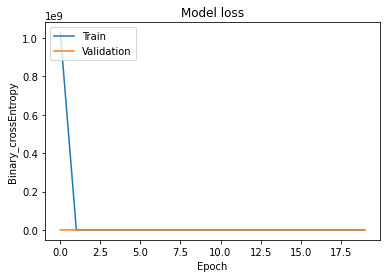

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Binary_crossEntropy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

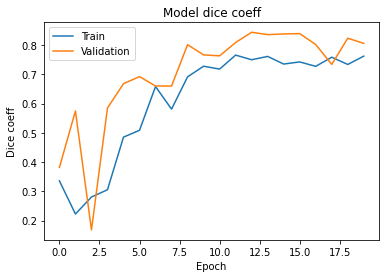

In [91]:
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('Model dice coeff')
plt.ylabel('Dice coeff')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

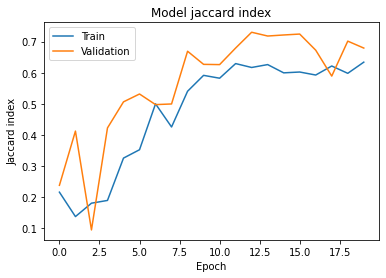

In [92]:
plt.plot(history.history['jaccard_index'])
plt.plot(history.history['val_jaccard_index'])
plt.title('Model jaccard index')
plt.ylabel('Jaccard index')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Testing

# Test reshaped (channels first)

In [93]:
print(x_test.shape)
r_x_test = x_test.reshape((5, 3, 512, 512))
print(r_x_test.shape)

(5, 512, 512, 3)
(5, 3, 512, 512)


In [94]:
#print(y_test.shape)
#r_y_test = x_test.reshape((5, 3, 512, 512))
#print(r_y_test.shape)

In [95]:
#from keras.models import load_model
#model = load_model('./assets')
model.load_weights('./model.h5')

test_preds = model.predict(r_x_test)
print(test_preds.shape)
print(type(test_preds))

(5, 3, 512, 512)
<class 'numpy.ndarray'>


<class 'numpy.ndarray'>
(5, 3, 512, 512)
float32


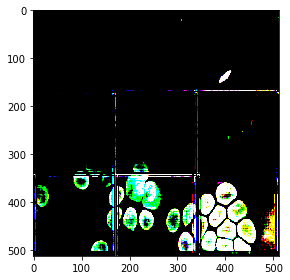

In [96]:
print(type(test_preds))
print(test_preds.shape)
print(test_preds.dtype)
#print(test_preds[0])
imshow(test_preds[0].reshape(512, 512, 3))


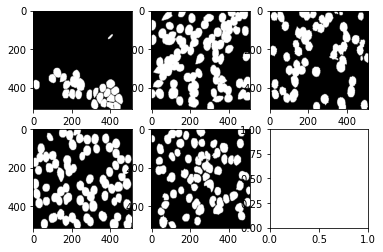

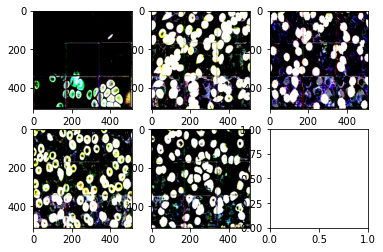

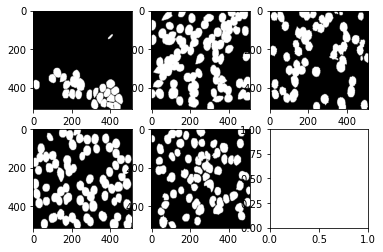

In [97]:
from skimage.io import imshow_collection
imshow_collection(test_preds.reshape(5, 512, 512, 3))
imshow_collection(y_test)

# Evaluating Individual Dice-Co efficient
# Metrics for individual evaluation

In [98]:
def dice_coef2(a, b):
          #  hi = K.hi
          #  hi = hi / 255
    
          #    hi = tf.convert_to_tensor(hi, dtype=None)
          #    pred = tf.convert_to_tensor(test_preds, dtype=None)
    hi = a/255
    pred = b
    hi = K.flatten(hi)
    pred = K.flatten(pred)
    upper_part = 2 * K.sum((hi * pred))
    lower_part = K.sum(hi + pred)
    dice = upper_part / lower_part
    return dice

def jaccard_index2(a, b):
    hi = a/255
    pred = b
    hi = K.flatten(hi)
    pred = K.flatten(pred)
    numerator = K.sum(hi * pred)
    denominator = K.sum((hi + pred) - (hi * pred))
    iou = numerator / denominator
    return iou

float32
float32
Dice Co-efficient:  tf.Tensor(0.6876971, shape=(), dtype=float32)
Jaccard-index:  tf.Tensor(0.52403843, shape=(), dtype=float32)


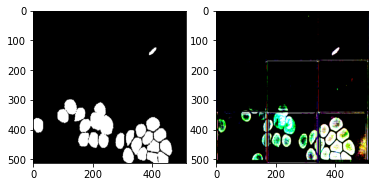

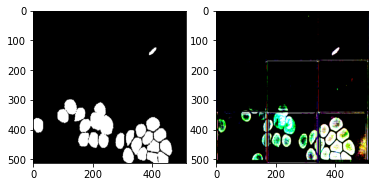

In [99]:
print(y_test[0].dtype)
print(test_preds[0].dtype)
i = y_test[0]
j = test_preds[0]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j.reshape((512, 512, 3))
imshow_collection(x)

float32
float32
Dice Co-efficient:  tf.Tensor(0.88137984, shape=(), dtype=float32)
Jaccard-index:  tf.Tensor(0.7879167, shape=(), dtype=float32)


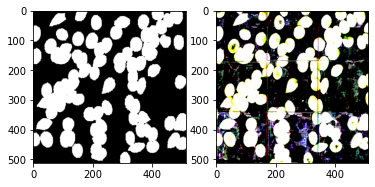

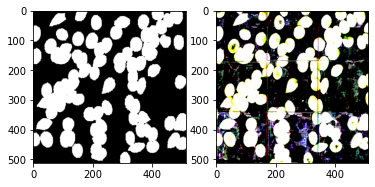

In [100]:
print(y_test[1].dtype)
print(test_preds[1].dtype)
i = y_test[1]
j = test_preds[1]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j.reshape((512, 512, 3))
imshow_collection(x)

float32
float32
Dice Co-efficient:  tf.Tensor(0.8105851, shape=(), dtype=float32)
Jaccard-index:  tf.Tensor(0.681499, shape=(), dtype=float32)


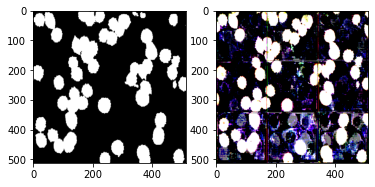

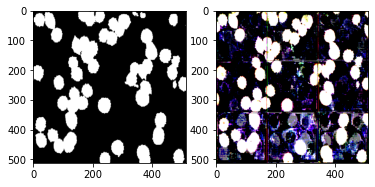

In [101]:
print(y_test[2].dtype)
print(test_preds[2].dtype)
i = y_test[2]
j = test_preds[2]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j.reshape((512, 512, 3))
imshow_collection(x)

float32
float32
Dice Co-efficient:  tf.Tensor(0.8430361, shape=(), dtype=float32)
Jaccard-index:  tf.Tensor(0.7286626, shape=(), dtype=float32)


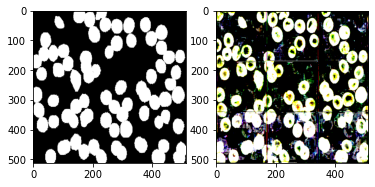

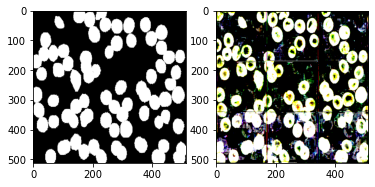

In [102]:
print(y_test[3].dtype)
print(test_preds[3].dtype)
i = y_test[3]
j = test_preds[3]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j.reshape((512, 512, 3))
imshow_collection(x)

float32
float32
Dice Co-efficient:  tf.Tensor(0.86141086, shape=(), dtype=float32)
Jaccard-index:  tf.Tensor(0.7565598, shape=(), dtype=float32)


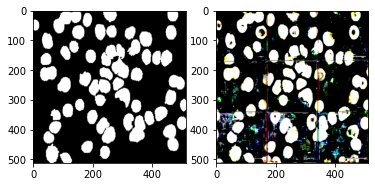

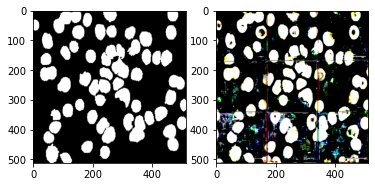

In [103]:
print(y_test[4].dtype)
print(test_preds[4].dtype)
i = y_test[4]
j = test_preds[4]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j.reshape((512, 512, 3))
imshow_collection(x)

# Average Test Dice Co-efficient, Jaccard index

In [104]:
#dice_list = np.array(len(test_preds))
#jaccard_list = np.array(len(test_preds))
avg_dice = 0
avg_jaccard = 0
for x in range(len(test_preds)):
    i = y_test[x]
    j = test_preds[x]
    avg_dice = avg_dice + tf.get_static_value(dice_coef2(i,j))
    avg_jaccard = avg_jaccard + tf.get_static_value(jaccard_index2(i,j))
    
#print(dice_list.dtype)
#print(type(dice_list))
#print(dice_list)
#print(jaccard_list)
#avg_dice = tf.get_static_value(K.sum(dice_list)) / tf.get_static_value(tf.size(dice_list))
#avg_jaccard = tf.get_static_value(K.sum(jaccard_list)) / tf.get_static_value(tf.size(jaccard_list))
print('Average Test Dice co-efficent: ', avg_dice/len(test_preds))
print('Average Test Jaccrad Index: ', avg_jaccard/len(test_preds))
    

Average Test Dice co-efficent:  0.8168218016624451
Average Test Jaccrad Index:  0.6957353115081787


In [105]:
history

# Highest & Lowest

In [106]:
print('Lowest training loss: ', min(history.history['loss']))
print('Lowest validation loss: ', min(history.history['val_loss']))
print('Highest training dice coefficient: ', max(history.history['dice_coef']))
print('Highest validation dice coefficient: ', max(history.history['val_dice_coef']))
print('Highest training jaccrad index: ', max(history.history['jaccard_index']))
print('Highest validation jaccard index: ', max(history.history['val_jaccard_index']))

Lowest training loss:  4.820476531982422
Lowest validation loss:  4.97990608215332
Highest training dice coefficient:  0.7658610939979553
Highest validation dice coefficient:  0.8439874649047852
Highest training jaccrad index:  0.6338725686073303
Highest validation jaccard index:  0.7302188873291016
